#### Importación de bibliotecas

In [22]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de la base de datos

In [23]:
df = pd.read_csv("../Data/tourist_accommodation_clean.csv")
pd.set_option('display.max_columns', None)
df.head()

,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,45553,Centro,Desconocido,Private room,2,2,1,2,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,83531,C�rmenes,Latina,Private room,1,1,1,1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,4,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,2,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,153805,Quart,Desconocido,Private room,5,1,2,5,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


In [24]:
registros_totales = len(df)
print(f'Total de registros de la DB: {registros_totales}')

Total de registros de la DB: 9658


##### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.59     1.0      2.00      4.0       6.0     29.0
bathrooms                       1.59                 0.99     0.0      1.00      1.0       2.0     13.0
bedrooms                        1.93                 1.37     0.0      1.00      2.0       3.0     50.0
beds                            4.27                 2.59     1.0      2.00      4.0       6.0     29.0
price                        1013.35               934.23    60.0    450.00    750.0    1200.0  28571.0
minimum_nights                  4.97                17.98     1.0      1.00      2.0       4.0   1125.0
maximum_nights                759.20               498.49     1.0     62.00   1125.0    1125.0   1125.0
availability_30                13.04                11.84     0.0      0.00     11.0      26.0     30.0
availability_60            

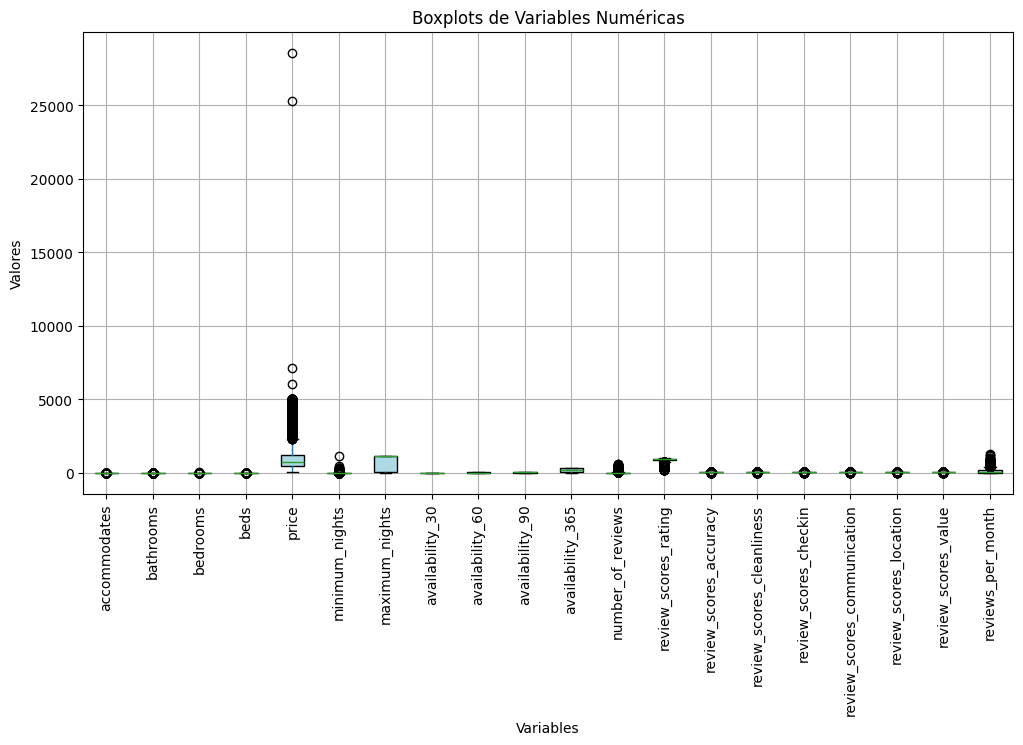

In [26]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

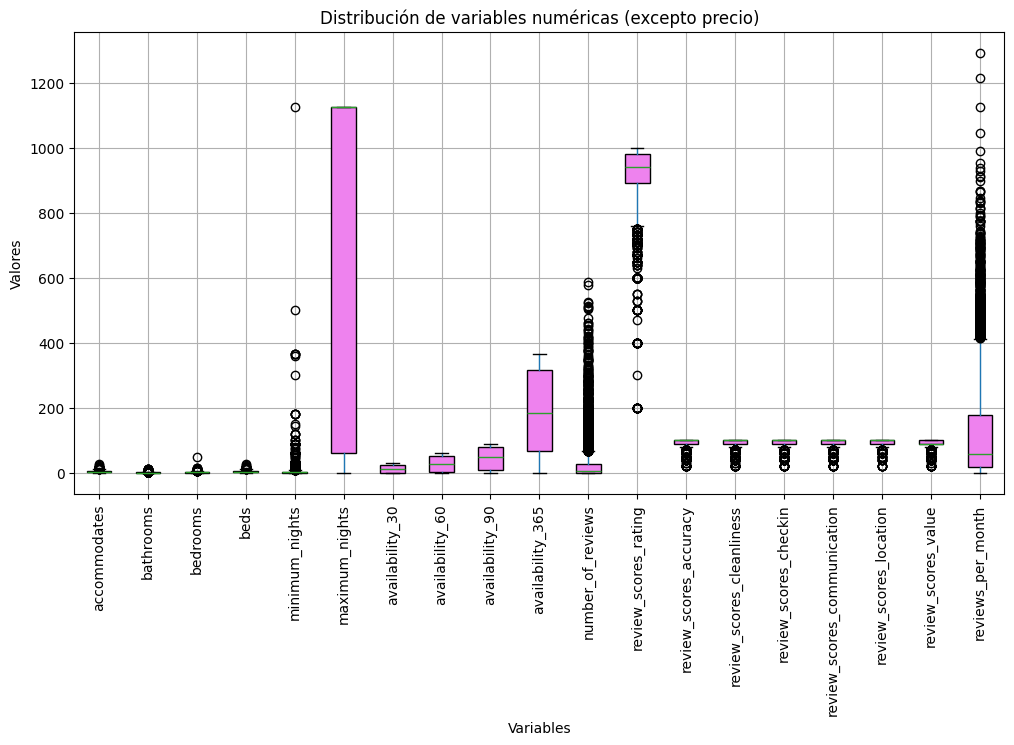

In [27]:
# nuevo gráfico para poder ver mejor las distribuciones

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## EDA CX

In [28]:
# valores únicos en cada columna
df.apply(pd.Series.nunique)

apartment_id                   9650
name                           9615
host_id                        7268
neighbourhood_name              521
neighbourhood_district           62
room_type                         4
accommodates                     21
bathrooms                        14
bedrooms                         15
beds                             21
amenities_list                 9492
price                           415
minimum_nights                   49
maximum_nights                  147
has_availability                  2
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               317
first_review_date              2159
last_review_date               1516
review_scores_rating             46
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin             8
review_scores_communication       8
review_scores_location      

In [29]:
# se elimina columna país, solo "Spain"
df = df.drop(['country'], axis=1)

### Filtrado de df sin reviews

In [30]:
df_no_reviews = df[df["number_of_reviews"] == 0]
df_with_reviews = df[df["number_of_reviews"] > 0]

registros_no_reviews = len(df_no_reviews)
registros_with_reviews = len(df_with_reviews)

no_review_percentage = ((df["number_of_reviews"] == 0).sum() / df["number_of_reviews"].count() * 100).round()

print(f'Registros totales: {registros_totales}\nTotal de registros sin reviews: {registros_no_reviews}\nTotal de registros con reviews: {registros_with_reviews}\nPorcentaje de alojamientos sin reviews: {no_review_percentage}%')

Registros totales: 9658
Total de registros sin reviews: 2536
Total de registros con reviews: 7122
Porcentaje de alojamientos sin reviews: 26.0%


### Rating

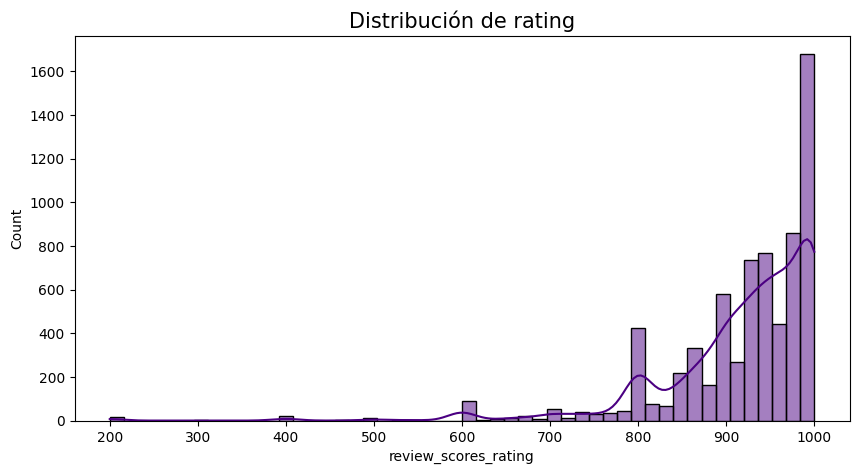

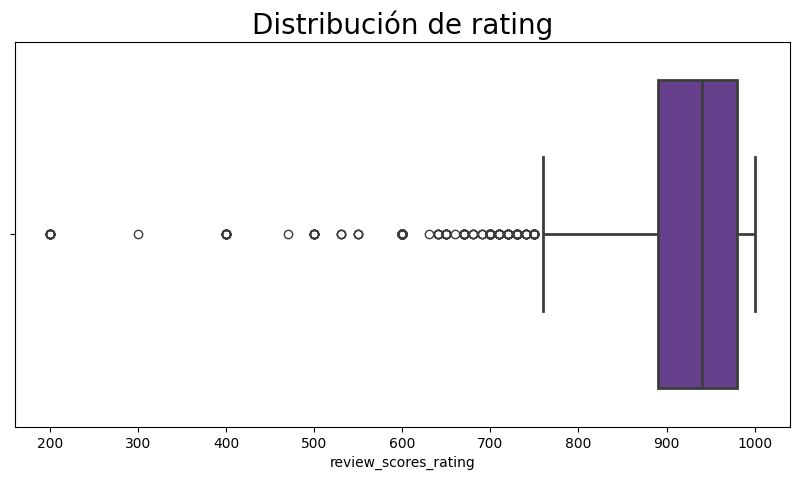

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df_with_reviews['review_scores_rating'], bins=50, kde=True, color='indigo')
plt.title('Distribución de rating', fontsize=15)


fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_rating', color='rebeccapurple', linewidth=2)
plt.title('Distribución de rating', fontsize=20)

plt.show();

### Accuracy

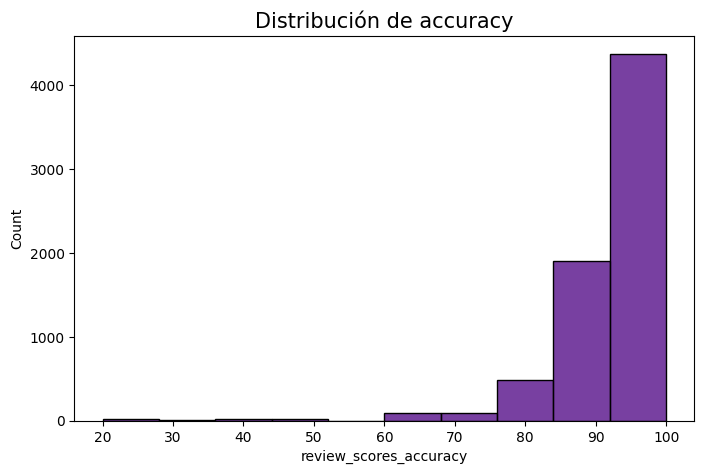

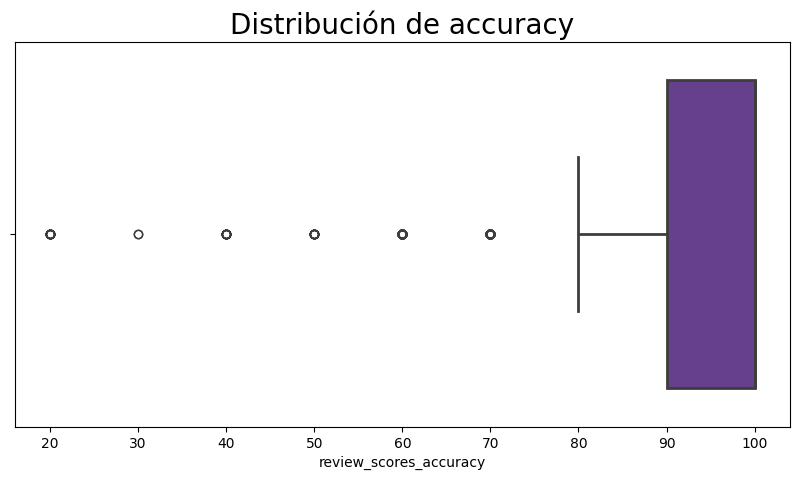

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_accuracy'], bins=10, color='indigo')
plt.title('Distribución de accuracy', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_accuracy', color='rebeccapurple', linewidth=2)
plt.title('Distribución de accuracy', fontsize=20)

plt.show();

### Cleanliness

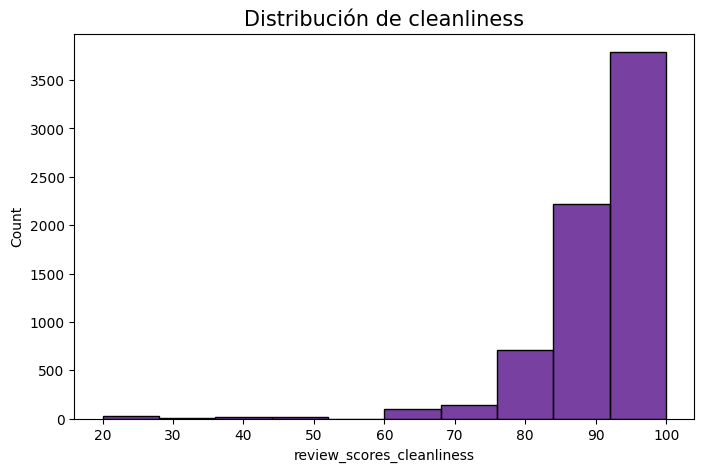

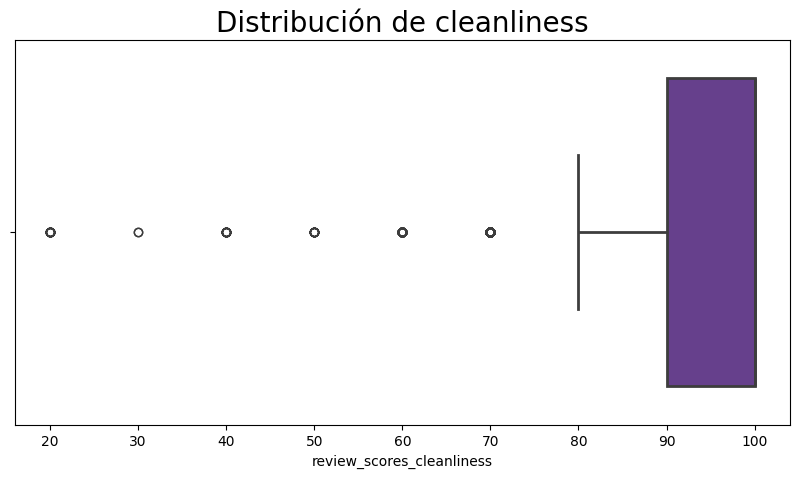

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_cleanliness'], bins=10, color='indigo')
plt.title('Distribución de cleanliness', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_cleanliness', color='rebeccapurple', linewidth=2)
plt.title('Distribución de cleanliness', fontsize=20)

plt.show();

### Checkin

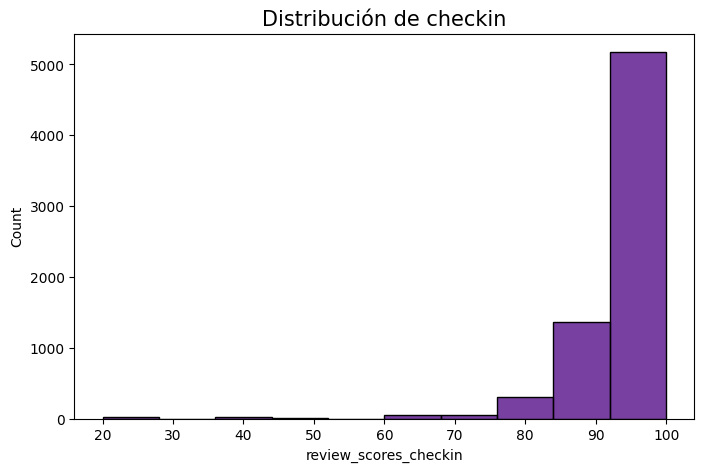

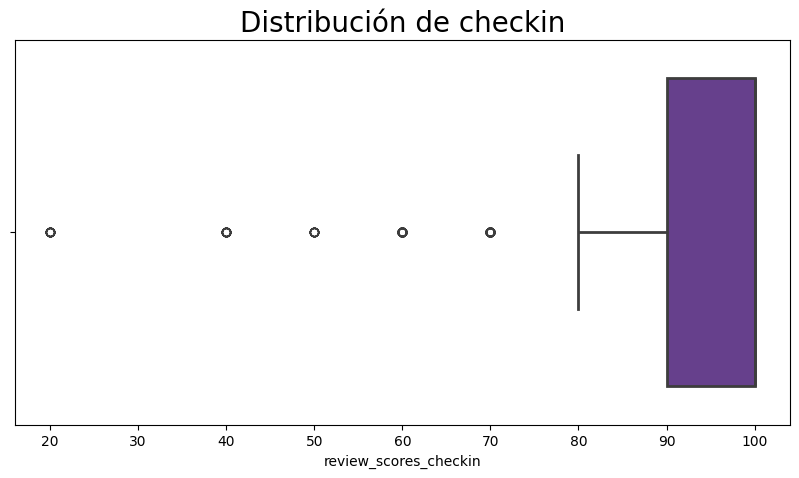

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_checkin'], bins=10, color='indigo')
plt.title('Distribución de checkin', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_checkin', color='rebeccapurple', linewidth=2)
plt.title('Distribución de checkin', fontsize=20)

plt.show();

### Communication

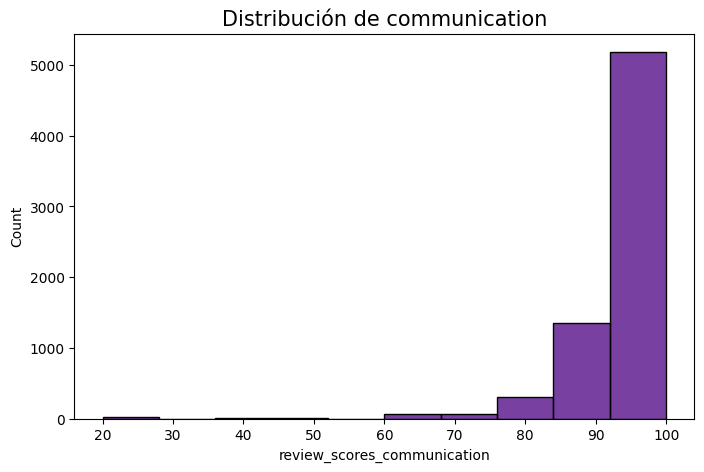

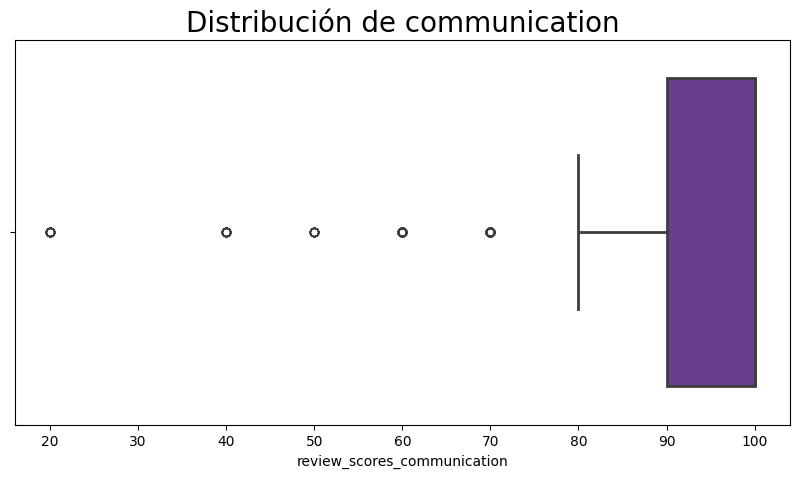

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_communication'], bins=10, color='indigo')
plt.title('Distribución de communication', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_communication', color='rebeccapurple', linewidth=2)
plt.title('Distribución de communication', fontsize=20)

plt.show();

### Location

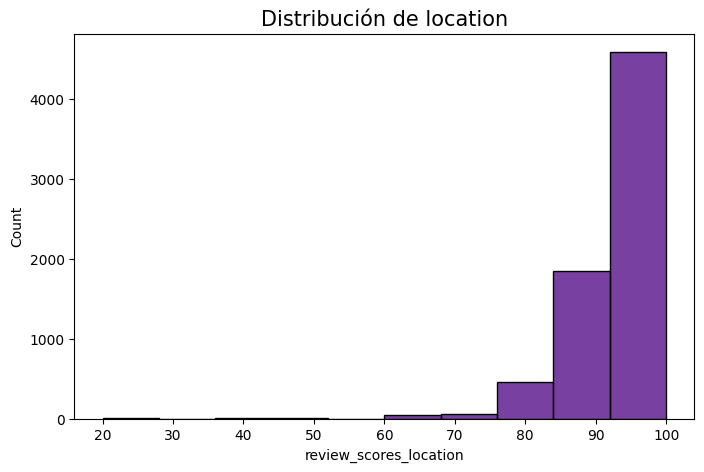

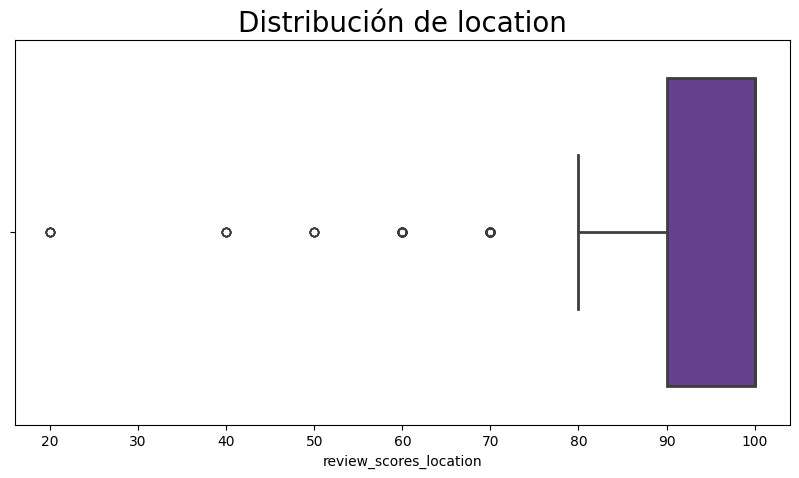

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_location'], bins=10, color='indigo')
plt.title('Distribución de location', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_location', color='rebeccapurple', linewidth=2)
plt.title('Distribución de location', fontsize=20)

plt.show();

### Value

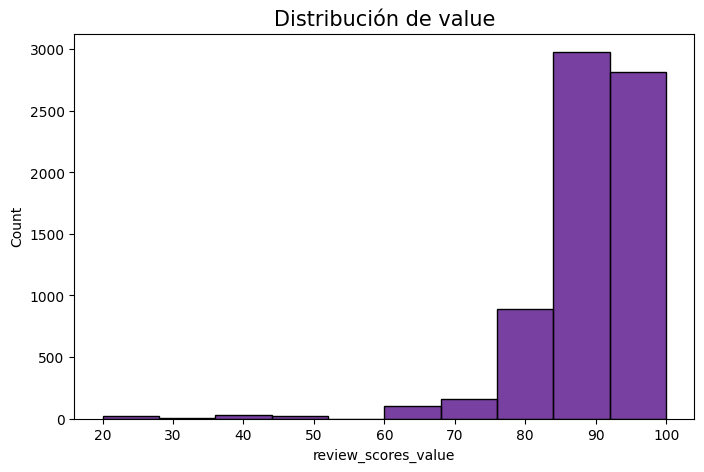

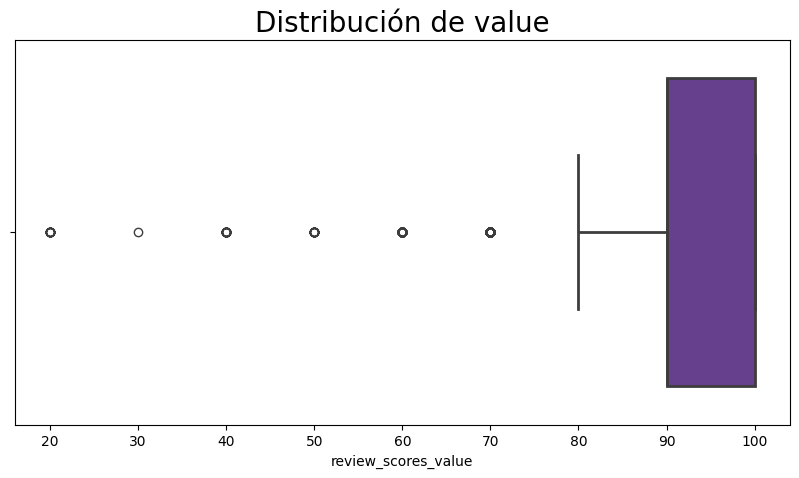

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df_with_reviews['review_scores_value'], bins=10, color='indigo')
plt.title('Distribución de value', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_reviews, x='review_scores_value', color='rebeccapurple', linewidth=2)
plt.title('Distribución de value', fontsize=20)

plt.show();

### Relaciones entre variables

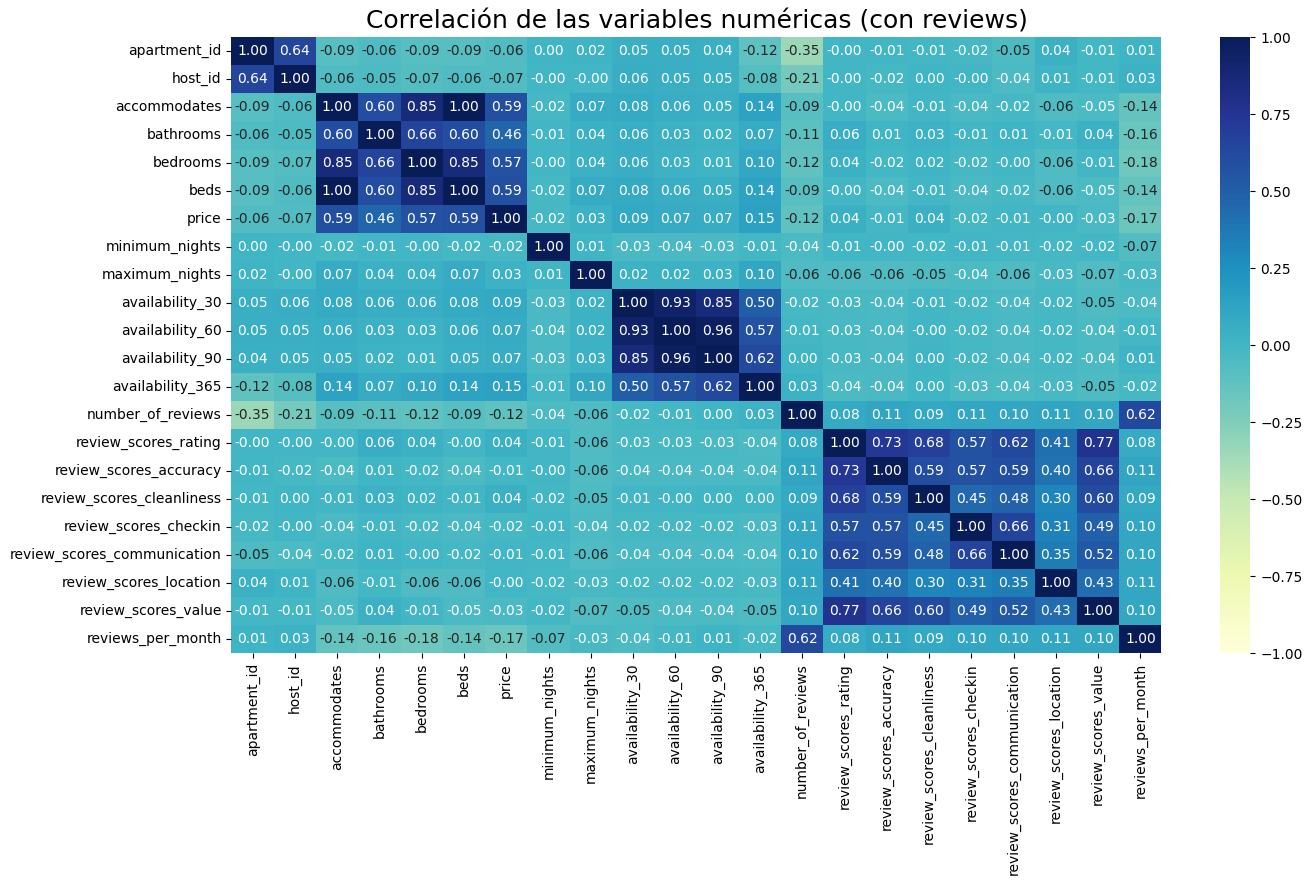

In [38]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_with_reviews.corr(numeric_only=True), vmin= -1, vmax=1, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlación de las variables numéricas (con reviews)', fontsize=18)
plt.show();

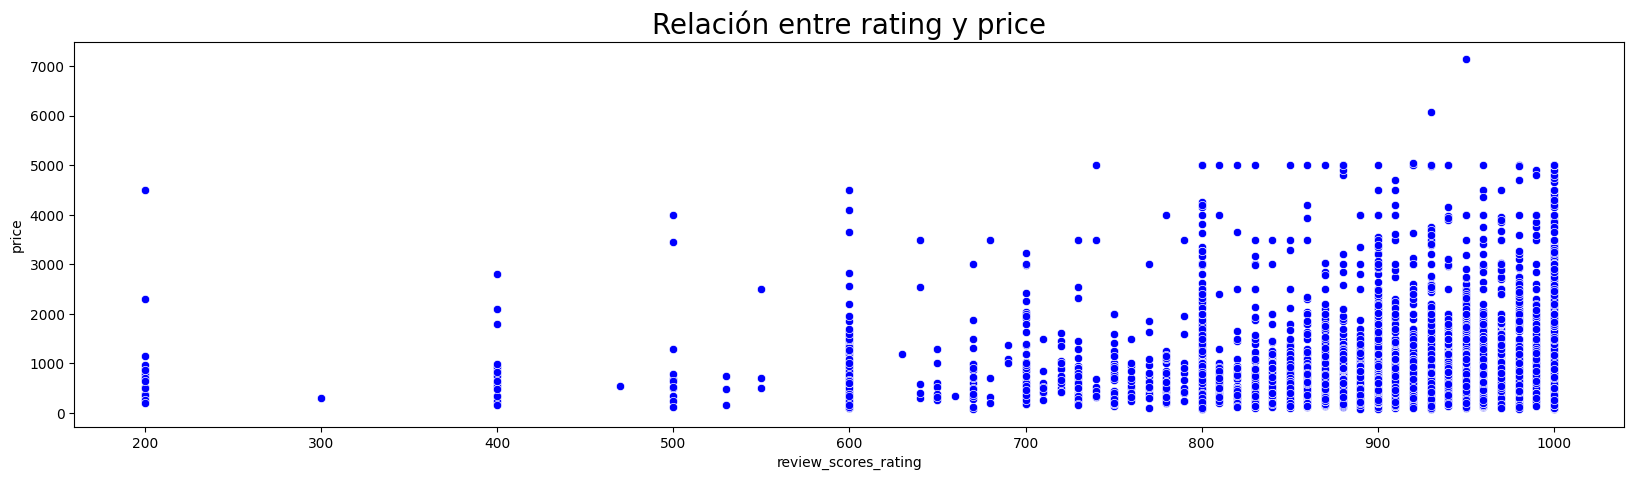

In [39]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df_with_reviews, x='review_scores_rating', y='price', color='blue')

plt.title('Relación entre rating y price', fontsize=20)
plt.show();

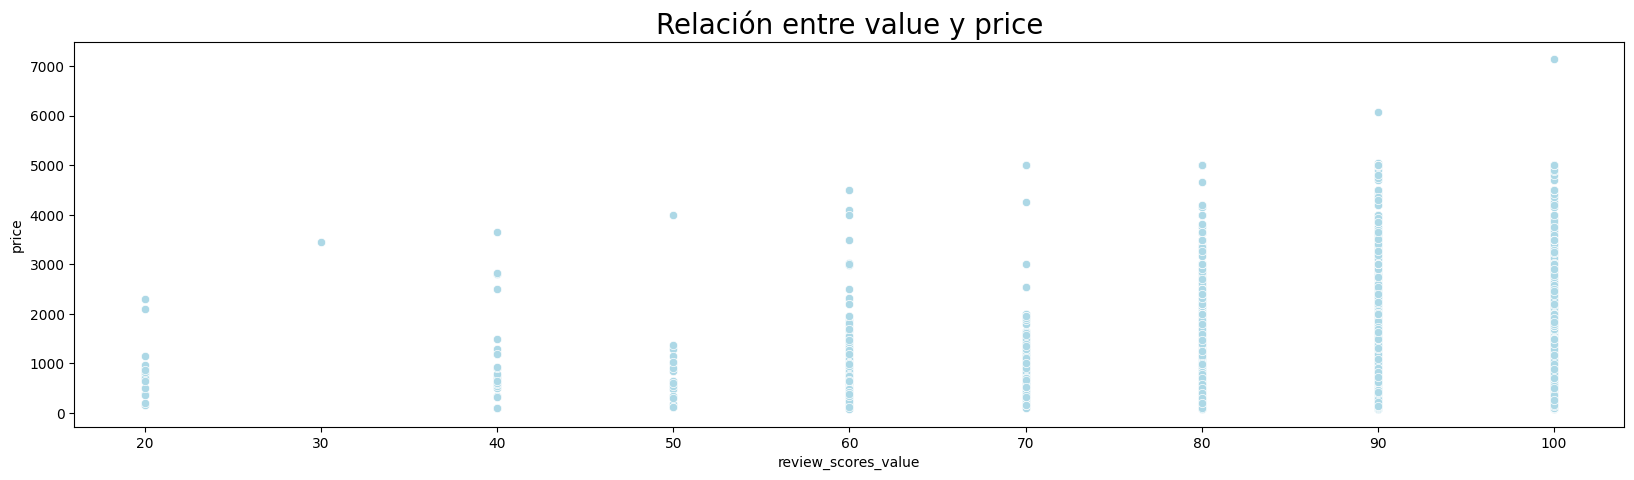

In [40]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df_with_reviews, x='review_scores_value', y='price', color='lightblue')

plt.title('Relación entre value y price', fontsize=20)
plt.show();

## KPIs de CX - en PowerBI

### 3. Índice de satisfacción general

### 4. Item con más satisfacción media

## Preguntas de negocio

### Calificación media de los alojamientos

In [41]:
avg_rating = df_with_reviews['review_scores_rating'].mean().round(2)
print(f'Calificación media de los alojamientos: {avg_rating}/1000')

Calificación media de los alojamientos: 918.92/1000


### Porcentaje de alojamientos con calificación sobre 80 por ciudad

In [44]:
# ciudad_agrupada = df_with_reviews.groupby("city")["review_scores_rating"]
# porcentaje_mayor_800 = (ciudad_agrupada.apply(lambda x: (x > 800).mean()) * 100).round().reset_index()

# porcentaje_mayor_800


## Comparación entre anuncios con y sin review